<a href="https://colab.research.google.com/github/PoojanSheth29/NeuralNetwork/blob/main/Stacked_Conv_DeNoisiy_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras


In [2]:
(x_train, _),(x_test, _) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_tain = x_train/255
x_test = x_test/255

# **Stacked Encoder :**
1st Encoder and 2nd decoder and then stack it


Image -> 100 -> 30 -> 100 -> Image -> Reshape

In [4]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
])

The decoder is the same but in the opposite order. Note that keras needs to know the input shape at this point. The input shape of the decoder is the shape of z, also called as zDim

In [5]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28]) 
])

In [6]:
# stack them for training

stacked_autoencoder = keras.models.Sequential([encoder,decoder])


In [7]:
stacked_autoencoder.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [8]:
history = stacked_autoencoder.fit(x_train,x_train,epochs=10,validation_data=[x_test,x_test])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: -490.5552 - accuracy: 0.0292 - val_loss: 0.6442 - val_accuracy: 0.0676
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: -496.2674 - accuracy: 0.0659 - val_loss: 0.6105 - val_accuracy: 0.0985
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: -496.5798 - accuracy: 0.1180 - val_loss: 0.6932 - val_accuracy: 0.1051
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: -496.7358 - accuracy: 0.1546 - val_loss: 0.7967 - val_accuracy: 0.0994
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: -496.7750 - accuracy: 0.1736 - val_loss: 0.9455 - val_accuracy: 0.1088
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: -496.8568 - accuracy: 0.1787 - val_loss: 1.0632 - val_accuracy: 0.0990
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: -496.8258 - accuracy: 0.1871 - val_loss: 

In [9]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1/1 [==============================] - 0s 14ms/step


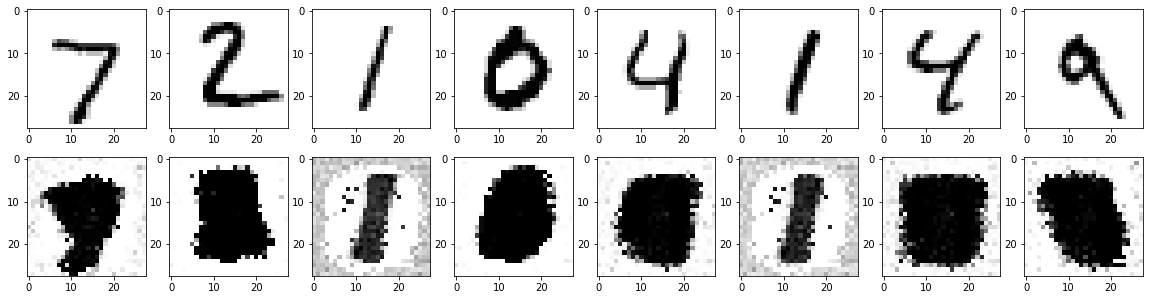

In [10]:
figsize(20,5)
for i in range(8):
  subplot(2,8,i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
  imshow(x_test[i],cmap='binary')

  subplot(2,8,i+8+1)
  imshow(pred.reshape((28,28)),cmap='binary')

1/1 [==============================] - 0s 43ms/step


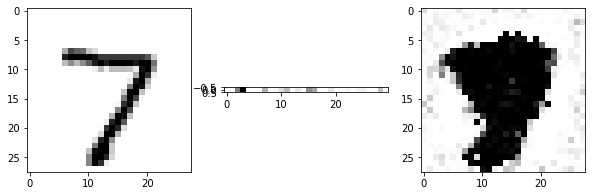

In [11]:
#Latent Encoder means je encoding thayu 6e ee kevu dekhaii
i = 0
figsize(10,5)
subplot(1,3,1)
imshow(x_test[i],cmap='binary')

subplot(1,3,2)
latent_vector = encoder.predict(x_test[i].reshape((1,28,28)))
imshow(latent_vector,cmap='binary')


subplot(1,3,3)
predi = decoder.predict(latent_vector)
imshow(predi.reshape(28,28),cmap='binary')

# **Convolution AutoEncoder**

In [12]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1],input_shape=[28,28]),
    keras.layers.Conv2D(16,kernel_size=(3,3), padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32,kernel_size=(3,3), padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2)
])

In [13]:
## here we do deconvolution so we dont take input shape in decoder like stacked autoencoder here there is different

encoder.predict(x_test[0].reshape(1,28,28)).shape

'''1/1 [==============================] - 5s 5s/step
(1, 3, 3, 64)'''
# shape for decoder layer

1/1 [==============================] - 5s 5s/step


'1/1 [==============================] - 5s 5s/step\n(1, 3, 3, 64)'

In [14]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32,kernel_size=(3,3), strides=2, padding='valid',activation='relu',input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16,kernel_size=(3,3), strides=2, padding='same',activation='relu'),
    keras.layers.Conv2DTranspose(1,kernel_size=(3,3), strides=2, padding='same',activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [15]:
conv_autoencoder = keras.models.Sequential([encoder,decoder])

In [16]:
conv_autoencoder.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [17]:
history = conv_autoencoder.fit(x_train,x_train,epochs=10,validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: -498.8862 - accuracy: 0.0208 - val_loss: 0.5868 - val_accuracy: 0.1630
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: -503.5687 - accuracy: 0.0607 - val_loss: 0.5432 - val_accuracy: 0.2591
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: -503.7985 - accuracy: 0.1229 - val_loss: 0.4988 - val_accuracy: 0.3059
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: -503.9333 - accuracy: 0.1614 - val_loss: 0.4764 - val_accuracy: 0.3645
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: -504.0429 - accuracy: 0.2036 - val_loss: 0.4580 - val_accuracy: 0.3970
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: -504.1373 - accuracy: 0.2177 - val_loss: 0.4244 - val_accuracy: 0.3933
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: -504.2178 - accuracy: 0.2275 - val_loss: 

In [18]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1/1 [==============================] - 0s 16ms/step


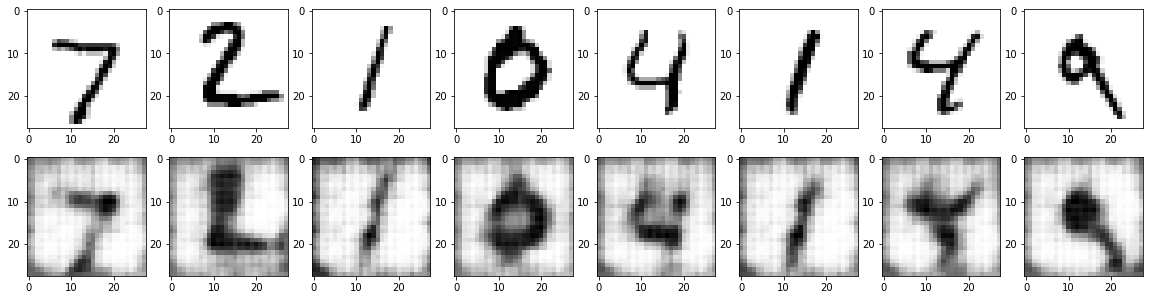

In [19]:
figsize(20,5)
for i in range(8):
  subplot(2,8,i+1)
  pred = conv_autoencoder.predict(x_test[i].reshape((1,28,28)))
  imshow(x_test[i],cmap='binary')

  subplot(2,8,i+8+1)
  imshow(pred.reshape((28,28)),cmap='binary')

Highly close to original image
ConvolutionAutoEncoder is better than StackAutoEncoder

# **Denoising AutoEncoders**

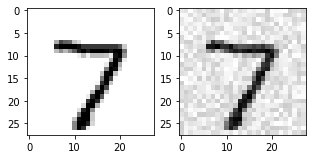

In [20]:
import numpy as np

figsize(5,10)
subplot(1,2,1)
imshow(x_test[0],cmap='binary')

subplot(1,2,2)
noise = np.random.random((28,28))/4 ## noise added
imshow(x_test[0]+ noise,cmap='binary')

In [21]:
#for removing noise also we need to make encoders and decoders
# in denoising not necessary to decrease size at every encoders so badha ma karvuj necessary nahi. 
#ek bottleneck hovu joiiye bus like ahiya 30 6e

encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    
])

In [22]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28]),
    
])

In [23]:
denoising_auto = keras.models.Sequential([encoder,decoder])

In [24]:
denoising_auto.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
# noise add karilu training and testing set

x_train_noise = x_train + (np.random.random((x_train.shape))/4)
x_test_noise = x_test + (np.random.random((x_test.shape))/4)


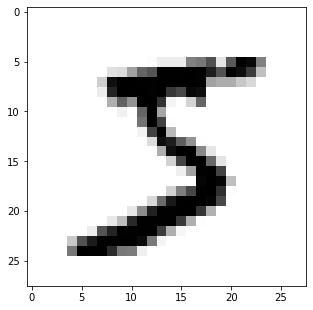

In [26]:
imshow(x_train_noise[0],cmap='binary')

In [27]:
hisotry = denoising_auto.fit(x_train_noise,x_train,epochs=10,validation_data=[x_test_noise,x_test])   #so model.fit(train&noise,train)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: -462.9033 - val_loss: 1.2264
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.8831 - val_loss: 1.2431
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.7998 - val_loss: 1.2427
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.7999 - val_loss: 1.2427
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.8001 - val_loss: 1.2426
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.7997 - val_loss: 1.2426
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.7998 - val_loss: 1.2425
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.7995 - val_loss: 1.2425
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: -465.7994 - val_loss: 1.2424
Epoch 10/10
1875/1875 [==============================] 

1/1 [==============================] - 0s 16ms/step


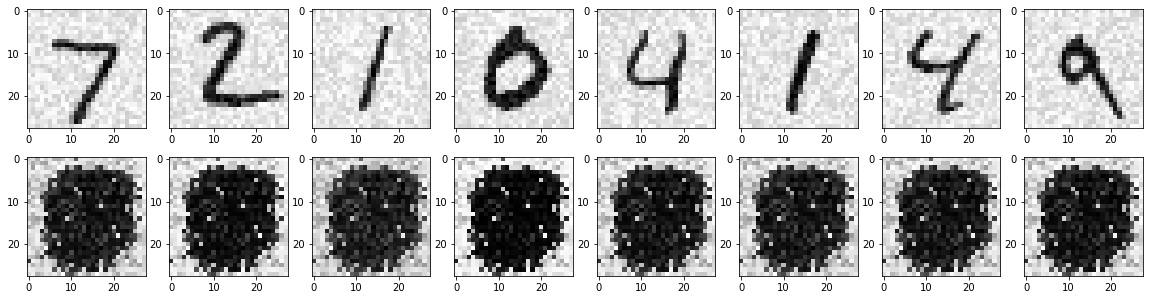

In [28]:
figsize(20,5)
for i in range(8):
  subplot(2,8,i+1)
  imshow(x_test_noise[i],cmap='binary')

  subplot(2,8,i+8+1)
  pred = denoising_auto.predict(x_test_noise[i].reshape((1,28,28)))
  imshow(pred.reshape((28,28)),cmap='binary')